![](../Assets/itd.png)
<div style= "Text-align: center">
    
# Analisis de Datos 
## Practica de laboratorio
### José Gabriel Rodriguez Rivas    
### Angel Omar Ceniceros Berumen
    
    

</div>

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [7]:
dataset_path = '..\\Data\\Map-Crime_Incidents-Previous_Three_Months.csv'

In [8]:
SF = pd.read_csv(dataset_path)
SF.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)"
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)"
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)"
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)"
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)"


In [9]:
SF.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location'],
      dtype='object')

### ¿Cuántas variables se incluyen en el marco de datos de SF (ignore el índice)?
##### R: 12

In [11]:
len(SF)

30760

In [13]:
SF['Month'] = SF['Date'].apply(lambda row: int(row[0:2]))
SF['Day'] = SF['Date'].apply(lambda row: int(row[3:5]))
SF.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Day
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)",8,31
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)",8,31
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)",8,31
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)",8,31
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)",8,31


In [17]:
del SF['IncidntNum']
SF.head()


,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)",8,31
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)",8,31
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)",8,31
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)",8,31
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)",8,31


In [18]:
SF.drop('Location', axis=1, inplace=True )

In [19]:
SF.columns

Index(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Month', 'Day'],
      dtype='object')

In [22]:
CountCategory = SF['Category'].value_counts()
CountCategory.head()

LARCENY/THEFT     8205
OTHER OFFENSES    4004
NON-CRIMINAL      3653
ASSAULT           2518
VEHICLE THEFT     1885
Name: Category, dtype: int64

In [23]:
SF['Category'].value_counts(ascending=True)

GAMBLING                          1
BRIBERY                           1
PORNOGRAPHY/OBSCENE MAT           1
BAD CHECKS                        3
SEX OFFENSES, NON FORCIBLE        5
LOITERING                         5
EXTORTION                         7
STOLEN PROPERTY                   7
FAMILY OFFENSES                   9
SUICIDE                          14
EMBEZZLEMENT                     19
LIQUOR LAWS                      38
PROSTITUTION                     44
ARSON                            60
RUNAWAY                          61
DISORDERLY CONDUCT               69
FORGERY/COUNTERFEITING           88
DRIVING UNDER THE INFLUENCE      93
SEX OFFENSES, FORCIBLE          123
KIDNAPPING                      128
DRUNKENNESS                     142
TRESPASS                        259
WEAPON LAWS                     322
FRAUD                           574
SUSPICIOUS OCC                  682
ROBBERY                         862
MISSING PERSON                 1135
BURGLARY                    

In [26]:

SF['PdDistrict'].value_counts(ascending=True)
SF.tail(1)


,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
30759,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,06/01/2014 07:00:00 AM +0000,13:15,INGLESIDE,"ARREST, CITED",MISSION ST / BOSWORTH ST,-122.426391,37.733675,6,1


### Crear subconjuntos de datos y organizarlos en marcos de datos mas pequeños

In [50]:
CrimenesAgosto = SF[SF['Month'] == 8]
CrimenesAgosto


,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day,PdDistrictCode
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31,1
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31,1
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31,1
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31,3
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Friday,08/01/2014 07:00:00 AM +0000,19:55,MISSION,NONE,1100.0 Block of POTRERO AV,-122.406497,37.754279,8,1,3
9716,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Friday,08/01/2014 07:00:00 AM +0000,22:47,RICHMOND,NONE,1500.0 Block of BRODERICK ST,-122.441458,37.784427,8,1,6
9717,ASSAULT,THREATS AGAINST LIFE,Friday,08/01/2014 07:00:00 AM +0000,23:55,BAYVIEW,NONE,400.0 Block of TUNNEL AV,-122.401364,37.709748,8,1,0
9718,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Friday,08/01/2014 07:00:00 AM +0000,23:38,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,8,1,4


### ¿Cuántos incidentes de delitos hubo en agosto?

In [29]:
len(CrimenesAgosto)

9720

### ¿Cuántos robos se informaron en agosto?


In [70]:
RobosAgosto = SF[(SF['Category']=='LARCENY/THEFT')|(SF['Category']=='VEHICLE THEFT')]
RobosAgosto.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day,PdDistrictCode
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31,1
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31,1
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31,1
5,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,00:01,CENTRAL,NONE,GRANT AV / SUTTER ST,-122.405403,37.789630,8,31,1
7,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,08/31/2014 07:00:00 AM +0000,10:30,INGLESIDE,NONE,200.0 Block of ATHENS ST,-122.427017,37.723453,8,31,2


In [32]:
Crimenes0105 = SF.query('Month == 8 and Day == 31')
Crimenes0105.head()


,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31


## Graficar Datos


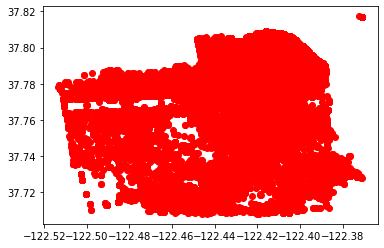

In [39]:
plt.plot(SF['X'],SF['Y'],'ro')
plt.show()

In [44]:
distritos = np.unique(SF['PdDistrict'])
colores_distritos = dict(zip(distritos,range(len(distritos))))
colores_distritos

{'BAYVIEW': 0,
 'CENTRAL': 1,
 'INGLESIDE': 2,
 'MISSION': 3,
 'NORTHERN': 4,
 'PARK': 5,
 'RICHMOND': 6,
 'SOUTHERN': 7,
 'TARAVAL': 8,
 'TENDERLOIN': 9}

In [48]:
SF['PdDistrictCode'] = SF['PdDistrict'].apply(lambda row: colores_distritos[row])

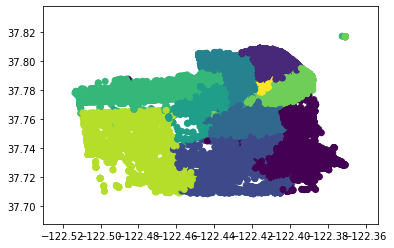

In [49]:
plt.scatter(SF['X'], SF['Y'], c=SF['PdDistrictCode'])
plt.show()


### Trazar grafico en mapa

In [63]:
from matplotlib import colors
districts = np.unique(SF['PdDistrict'])

print(list(colors.cnames.values())[0:len(districts)])

['#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF']


In [64]:
color_dict = dict(zip(districts, list(colors.cnames.values())[0:-1:len(districts)]))  
color_dict

{'BAYVIEW': '#F0F8FF',
 'CENTRAL': '#8A2BE2',
 'INGLESIDE': '#00FFFF',
 'MISSION': '#FF8C00',
 'NORTHERN': '#FF1493',
 'PARK': '#F8F8FF',
 'RICHMOND': '#4B0082',
 'SOUTHERN': '#FAFAD2',
 'TARAVAL': '#B0C4DE',
 'TENDERLOIN': '#9370DB'}

In [66]:
map_osm = folium.Map(location=[SF['Y'].mean(), SF['X'].mean()], zoom_start = 12)
plotEvery = 50
obs = list(zip( SF['Y'], SF['X'], SF['PdDistrict']))

for el in obs[0:-1:plotEvery]:
    
    folium.CircleMarker(el[0:2], color=color_dict[el[2]], fill_color=el[2],radius=10).add_to(map_osm)
 

In [67]:
map_osm